In [2]:
import tensorflow as tf
from functionsTF import *
from functions import *
from IO import *

%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import seaborn as sns
#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [5]:
import mutual_info

In [3]:
print(os.getcwd())

/mnt/DATA/gp1514/Projects/github/cortex/notebooks


In [2]:
N = 400
T = 6000

DEVICE = '/cpu:0'

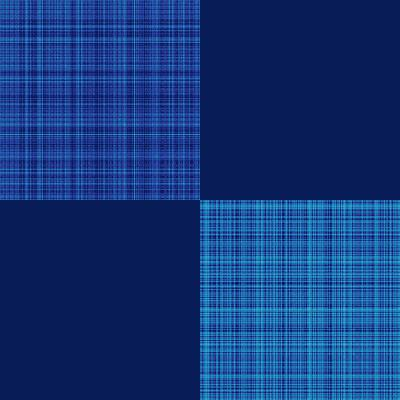

1490.00 ms
20.18


In [3]:
disp = True
tauv = 45
sG = 0
N = N
both=False

### input 1: apple
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, device=DEVICE, both=both)
np.random.seed(2)
apple = generateInput(2, T)
gpu.input = apple
gpu.both = True
gpu.runTFSimul()
apple_out = gpu.vvm[-1000:]

In [ ]:
# for T in [60000, 10000, 6000]:
#     for both in [True, False]:
#         for N in [400]:
#             for sG in [0,10,20,50]:
#                 for tauv in np.arange(15,95,5):
#                     ### input 1: apple
#                     disp=False
#                     gpu1 = Tfnet(N=N,T=T, disp=False, tauv=tauv, sG=sG, device=DEVICE, both=both, spikeMonitor=False)
#                     apple = generateInput(2, T, 60)
#                     gpu1.input = apple
#                     gpu1.runTFSimul()
#                     apple_out = gpu1.vvm[-1000:]
                    
#                     ### input 2: pear
#                     disp=False
#                     gpu2 = Tfnet(N=N,T=T, disp=False, tauv=tauv, sG=sG, device=DEVICE, both=both, spikeMonitor=False)
#                     pear = generateInput(3, T, 60)
#                     gpu2.input = pear
#                     gpu2.runTFSimul()
#                     pear_out = gpu2.vvm[-1000:]

#                     filename = "MI6-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T=%d" % (str(both), tauv,sG, N, 'test', T)
#                     with open(filename, 'wb') as f:
#                         np.savez(f,vvmN1 = gpu1.vvmN1, vvmN2 = gpu1.vvmN2, vvm = gpu1.vvm,
#                                 vvmN1_2 = gpu2.vvmN1, vvmN2_2 = gpu2.vvmN2, vvm_2 = gpu2.vvm)
#                     del gpu1
#                     del gpu2

12.77


In [12]:
df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 
                           'corS_apple', 'corE_apple','corS_pear', 'corE_pear', 'corChange_apple', 'corChange_pear', 
                           'm1s', 'm1e','m2s', 'm2e', 'mChangeN1', 'mChangeN2',
                           'm1s_pear', 'm1e_pear', 'm2s_pear', 'm2e_pear', 'mChangeN1_pear', 'mChangeN2_pear',
                          'mTest') )
cwd = os.getcwd()
print(cwd)
i=-1
d = 500
sigma = 2
F=60
for T in [6000, 10000, 60000]:
    apple = generateInput(2, T, 60)
    pear = generateInput(3, T, 60)
    for both in [ False, True]:
        for N in [400]:
            for sG in [0,10,20,50]:
                for tauv in np.arange(15,95,5):
                    if 1:
                        i+=1
                        filename = "MI10-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_F-%d" % (str(both), tauv,sG, N, 'test', T, F)
                        a = np.load(filename)
                        cor1 = np.corrcoef(a['vvmN1'][100:100+d], a['vvmN2'][100:100+d])[0,1]
                        cor2 = np.corrcoef(a['vvmN1'][T-d:T], a['vvmN2'][T-d:T])[0,1]
                        cor1_2 = np.corrcoef(a['vvmN1_2'][100:100+d], a['vvmN2_2'][100:100+d])[0,1]
                        cor2_2 = np.corrcoef(a['vvmN1_2'][T-d:T], a['vvmN2_2'][T-d:T])[0,1]
                        corChange = cor2/cor1
                        corChange_2 = cor2_2/cor1_2
    #                     m1 = float(mutual_info.mutual_information_2d((a['vvmN1'][100:100+d]), (a['vvmN2'][100:100+d]), 
    #                                                                  normalized=False, sigma=sigma) )
    #                     m2 = float(mutual_info.mutual_information_2d((a['vvmN1'][T-d:T]), (a['vvmN2'][T-d:T]), 
    #                                                                 normalized=False, sigma=sigma))
                        m1s = float(mutual_info.mutual_information_2d((apple[100:100+d]), (a['vvmN1'][100:100+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m1e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN1'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        m2s = float(mutual_info.mutual_information_2d((apple[100:100+d]), (a['vvmN2'][100:100+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m2e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        mChangeN1 = m1e/m1s
                        mChangeN2 = m2e/m2s

                        m1s_pear = float(mutual_info.mutual_information_2d((pear[100:100+d]), (a['vvmN1_2'][100:100+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m1e_pear = float(mutual_info.mutual_information_2d((pear[T-d:T]), (a['vvmN1_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        m2s_pear = float(mutual_info.mutual_information_2d((pear[100:100+d]), (a['vvmN2_2'][100:100+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m2e_pear = float(mutual_info.mutual_information_2d((pear[T-d:T]), (a['vvmN2_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        
                        mTest = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN2_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        mChangeN1_pear = m1e_pear/m1s_pear
                        mChangeN2_pear = m2e_pear/m2s_pear
    #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
                        df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), 
                                     cor1, cor2, cor1_2, cor2_2,
                                     corChange, corChange_2, 
                                     m1s, m1e, m2s, m2e, mChangeN1, mChangeN2,
                                     m1s_pear, m1e_pear, m2s_pear, m2e_pear, mChangeN1_pear, mChangeN2_pear,
                                    mTest]
                    else:
                        pass

/mnt/DATA/gp1514/Projects/github/cortex/notebooks


In [13]:
df.to_csv(DIRECTORY + 'MI10.csv')

In [11]:
df

,tauv,sG,both,T,N,corS_apple,corE_apple,corS_pear,corE_pear,corChange_apple,...,m2s,m2e,mChangeN1,mChangeN2,m1s_pear,m1e_pear,m2s_pear,m2e_pear,mChangeN1_pear,mChangeN2_pear
0,15.0,0.0,False,6000.0,400.0,0.111273,0.179047,-0.074338,-0.085399,1.609081,...,0.189958,0.194501,1.087365,1.023917,0.568119,0.658986,0.177338,0.181552,1.159943,1.023761
1,20.0,0.0,False,6000.0,400.0,0.006639,0.052781,-0.048782,-0.119674,7.949859,...,0.227397,0.229424,1.032590,1.008916,0.568200,0.606346,0.171413,0.216643,1.067134,1.263864
2,25.0,0.0,False,6000.0,400.0,-0.012352,0.051074,0.048445,0.023763,-4.134714,...,0.172144,0.281041,1.124332,1.632595,0.603767,0.654486,0.177072,0.198943,1.084004,1.123516
3,30.0,0.0,False,6000.0,400.0,0.004933,-0.104715,0.030995,0.015022,-21.226924,...,0.178912,0.240636,1.077184,1.344998,0.562445,0.604829,0.182146,0.241139,1.075357,1.323874
4,35.0,0.0,False,6000.0,400.0,0.058986,-0.057653,0.009173,-0.062526,-0.977411,...,0.178408,0.219702,0.988791,1.231456,0.555619,0.655412,0.168165,0.164211,1.179606,0.976490
5,40.0,0.0,False,6000.0,400.0,-0.012610,-0.049507,-0.067105,-0.070189,3.925866,...,0.165403,0.233706,1.044474,1.412947,0.554883,0.679430,0.188218,0.185231,1.224457,0.984129
6,45.0,0.0,False,6000.0,400.0,-0.013976,-0.000561,0.070391,0.021636,0.040119,...,0.193450,0.239732,1.029748,1.239247,0.547172,0.684635,0.183364,0.220578,1.251225,1.202948
7,50.0,0.0,False,6000.0,400.0,-0.059847,-0.013894,-0.024415,-0.059329,0.232154,...,0.159933,0.301019,1.167722,1.882158,0.573184,0.658391,0.173113,0.306454,1.148655,1.770254
8,55.0,0.0,False,6000.0,400.0,-0.021823,-0.098439,0.019426,0.020257,4.510672,...,0.163303,0.288246,1.022180,1.765095,0.609225,0.645863,0.127992,0.338635,1.060139,2.645751
9,60.0,0.0,False,6000.0,400.0,-0.083189,-0.005691,-0.024586,0.017165,0.068410,...,0.147656,0.293909,1.052774,1.990495,0.555305,0.662714,0.181239,0.271102,1.193423,1.495831


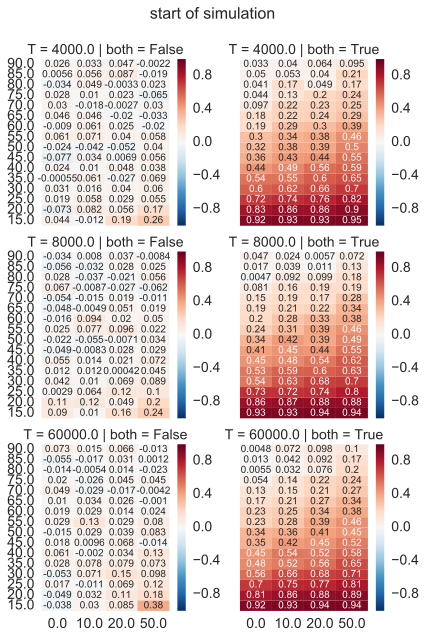

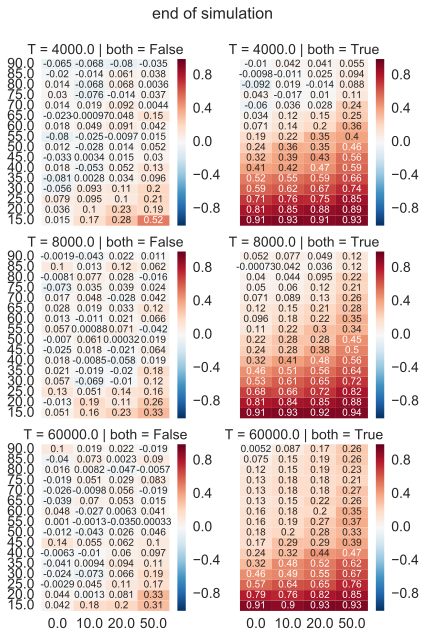

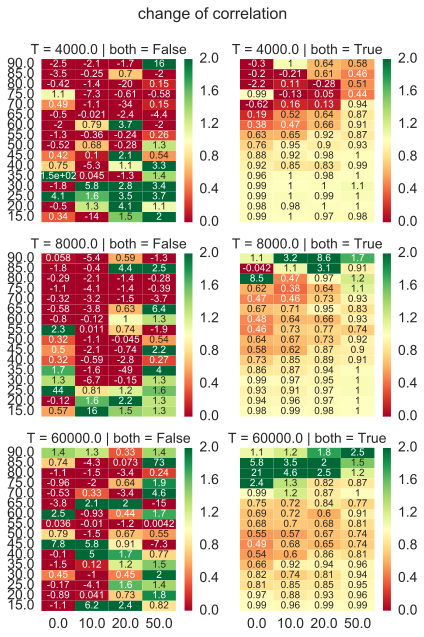

In [238]:
def facet_heatmap(data, col='cor1', **kws):
    cols = ['cor1', 'cor2', 'corChange']
#     data = pd.melt(df, id_vars=['tauv', 'sG'], value_vars=cols)
    data = data[data['variable']==col]
    data = data.pivot(index='tauv', columns='sG', values='value')
    im = sns.heatmap(data, annot=True, **kws) 
    im.invert_yaxis()
    

def plotGrid(df, col, title='', **kws):
    cols = ['cor1', 'cor2', 'corChange']
    data = pd.melt(df, id_vars=['tauv', 'sG', 'T', 'both'], value_vars=cols)

    with sns.plotting_context(font_scale=5.5):
        g = sns.FacetGrid(data, col="both",  row="T")
    g = g.map_dataframe(facet_heatmap, col=col, **kws)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize='16')
    g.savefig(DIRECTORY + 'cor-plot_%s.png'%col)

plotGrid(df, 'cor1', 'start of simulation', cmap="RdBu_r", vmin=-0.1, vmax=1.0)
plotGrid(df, 'cor2', 'end of simulation', cmap="RdBu_r", vmin=-.1, vmax=1.0)
plotGrid(df, 'corChange', 'change of correlation',  cmap="RdYlGn", norm=MidpointNormalize(midpoint=1.), vmin=0, vmax=2)





## Correlation between parameters (tauv, sG) and outputs ('cor1', 'cor2')

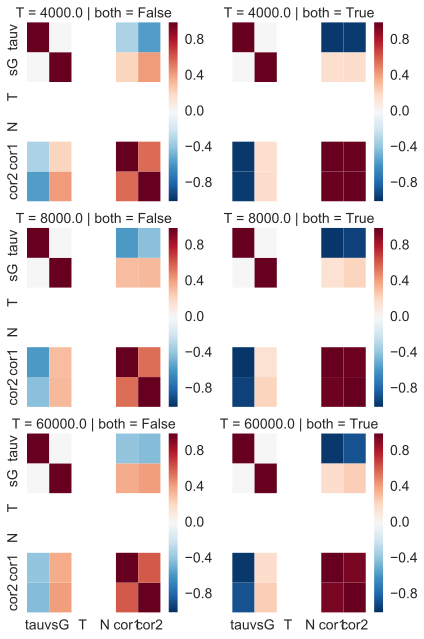

In [134]:
g = sns.FacetGrid(df, col="both",  row="T")
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0))

In [158]:
# g = sns.FacetGrid(df, col="both",  row="T")
# g = g.map(plotHeatmap, df, col="cor1")
# g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0))

In [157]:
# with sns.plotting_context(font_scale=5.5):
#     g = sns.FacetGrid(df, col="both",  row="T")
# g = g.map_dataframe(plotHeatmap, df=df)

In [284]:
# for both in [True, False]:
#     plotGridHeatmap(df[(df['both']==both) & (df['T']==4000)], col_wrap=2, cols=['cor1', 'cor2'], cmap='RdBu_r')
#     plotGridHeatmap(df[(df['both']==both) & (df['T']==8000)], col_wrap=2, cols=['cor1', 'cor2'],  cmap='RdBu_r')
#     plotGridHeatmap(df[(df['both']==both) & (df['T']==60000)], col_wrap=2, cols=['cor1', 'cor2'],  cmap='RdBu_r')

In [224]:
# plotGridHeatmap(df[(df['both']==False) & (df['T']==60000)], col_wrap=2, cols=['cor1', 'cor2'])

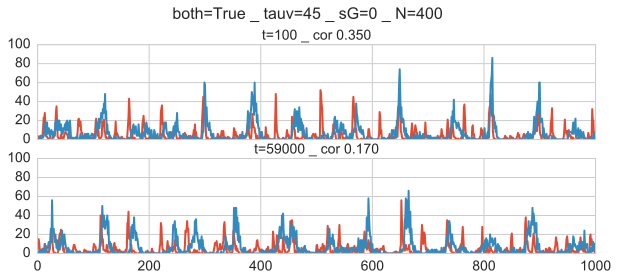

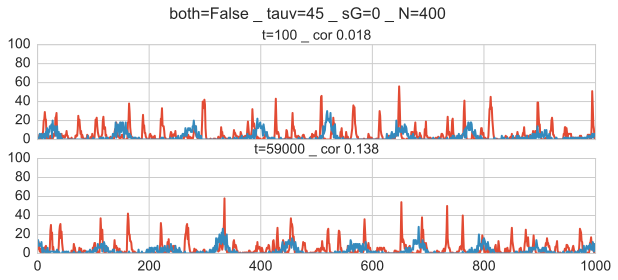

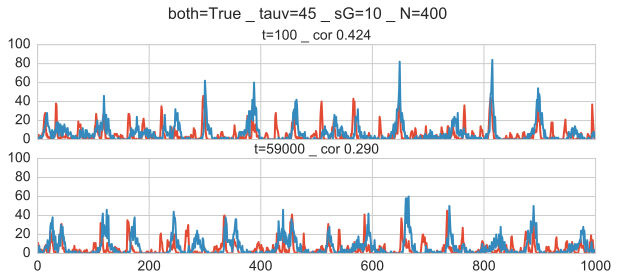

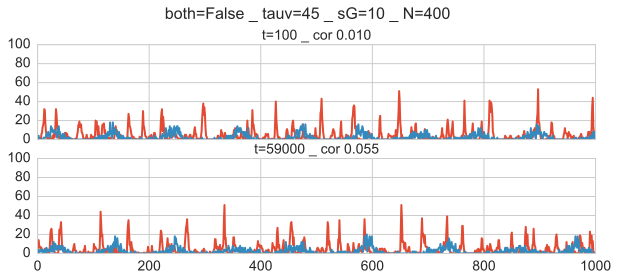

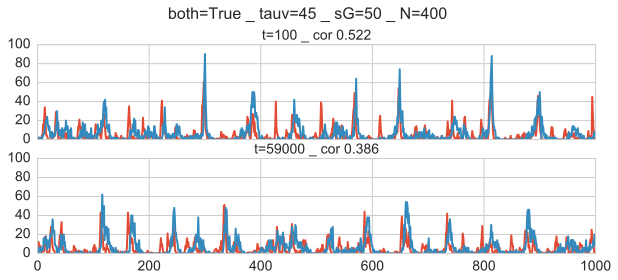

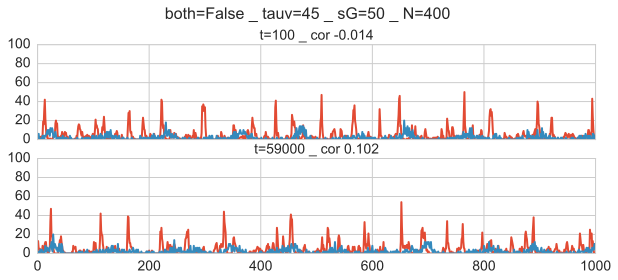

In [269]:
tauv = 45
sG = 50
N = 400
T = 60000
both=False

for sG in [0,10,50]:
    for both in [True, False]:
        filename = "both-%s_tauv-%d_sg-%d_N-%d_input-%s_T=%d" % (str(both), tauv,sG, N, 'test', T)
        a = np.load(filename)
        plotLFP()


In [265]:
print(np.corrcoef(gpu.vvmN1, gpu.vvmN2)[0,1])

def plotSim(start=100, duration=1000):
    t0 = start
    t1 = t0 + duration
    plt.figure()
    plt.plot(gpu.vvmN1[t0:t1])
    plt.plot(np.array(gpu.vvmN2[t0:t1])*1)
    plt.title('%.3f'% (np.corrcoef(gpu.vvmN1[t0:t1], gpu.vvmN2[t0:t1])[0,1]))
    plt.ylim([0,100])
    
def plotSimNP(a, ax = None, start=100, duration=1000):
    vvmN1 = np.array(a['vvmN1'])
    vvmN2 = np.array(a['vvmN2'])
    t0 = start
    t1 = t0 + duration
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.plot(vvmN1[t0:t1], label='N1')
    ax.plot(np.array(vvmN2[t0:t1])*2, label='N2')
    ax.set_title('t=%d _ cor %.3f'% (start, np.corrcoef(vvmN1[t0:t1], 2*vvmN2[t0:t1])[0,1]))
    ax.set_ylim([0,100])

def plotLFP():
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.set_xticklabels([])
    plt.subplots_adjust(top=0.85)
    # plt.tight_layout()
    fig.suptitle('both=%s _ tauv=%d _ sG=%d _ N=%d'% (str(both), tauv, sG, N), fontsize='16')
    plotSimNP(a,ax1, 100,1000)
    plotSimNP(a, ax2, T-1000,1000)
    plt.savefig(DIRECTORY + 'LFP_both=%s_tauv=%d_sG=%d_N=%d'% (str(both), tauv, sG, N))

-0.00332319564067


In [41]:
disp = False
tauv = 15
sG = 50
T = 4000
both = False
DEVICE = '/cpu:0'

### input 1: apple
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, both=both, device=DEVICE)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out_1 = gpu.vvmN1[-1000:]
apple_out_2 = gpu.vvmN2[-1000:]

### input 1: apple N200
gpu = Tfnet(N=N//2,T=T, disp=disp, tauv=tauv, sG=sG, both=both, device=DEVICE)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out_200_1 = gpu.vvmN1[-1000:]
apple_out_200_2 = gpu.vvmN2[-1000:]


### input 2: pear
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, both=both, device=DEVICE)
np.random.seed(3)
pear = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = pear
gpu.runTFSimul()
pear_out_1 = gpu.vvmN1[-1000:]
pear_out_2 = gpu.vvmN2[-1000:]


tauv = 45


### input 1: apple
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, both=both, device=DEVICE)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out_45_1 = gpu.vvmN1[-1000:]
apple_out_45_2 = gpu.vvmN2[-1000:]


### input 1: apple N200
gpu = Tfnet(N=N//2,T=T, disp=disp, tauv=tauv, sG=sG, both=both)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out_200_45_1 = gpu.vvmN1[-1000:]
apple_out_200_45_2 = gpu.vvmN2[-1000:]


### input 2: pear
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, both=both, device=DEVICE)
np.random.seed(3)
pear = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = pear
gpu.runTFSimul()
pear_out_45_1 = gpu.vvmN1[-1000:]
pear_out_45_2 = gpu.vvmN2[-1000:]

11.69
8.36
11.56
11.85
10.33
11.78


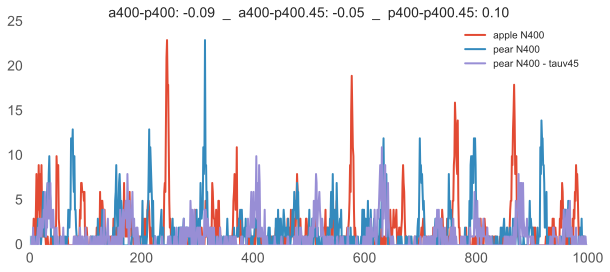

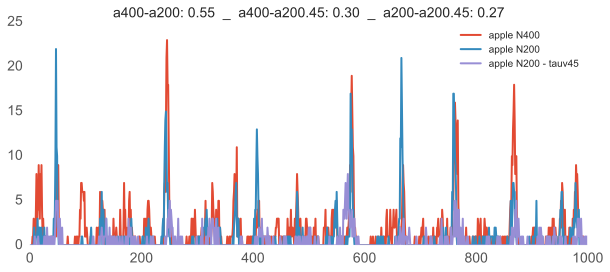

In [42]:
plt.figure(figsize=(10,4))
plt.plot(apple_out_2, label='apple N400')
plt.plot(pear_out_2, label='pear N400')
plt.plot(pear_out_45_2, label='pear N400 - tauv45')
plt.legend()
cor = np.corrcoef([apple_out_2, pear_out_2, pear_out_45_2])
plt.title('a400-p400: %.2f  _  a400-p400.45: %.2f  _  p400-p400.45: %.2f'%(cor[0,1], cor[0,2], cor[1,2]))
# plt.ylim([0,40])
plt.savefig(DIRECTORY + 'apple-pear-both_%s-%d.png'%(both,sG))

plt.figure(figsize=(10,4))
plt.plot(apple_out_2, label='apple N400')
plt.plot(apple_out_200_2, label='apple N200')
plt.plot(apple_out_200_45_2, label='apple N200 - tauv45')
plt.legend()
# plt.ylim([0,80])
cor = np.corrcoef([apple_out_2, apple_out_200_2, apple_out_200_45_2])
plt.title('a400-a200: %.2f  _  a400-a200.45: %.2f  _  a200-a200.45: %.2f'%(cor[0,1], cor[0,2], cor[1,2]))
plt.savefig(DIRECTORY + 'apple-apple-both_%s-%d.png'%(both,sG))



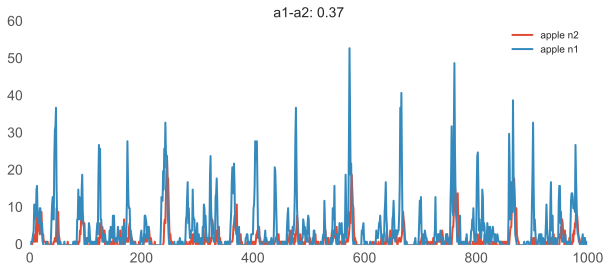

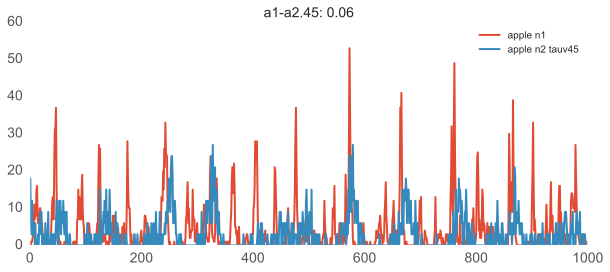

In [48]:
plt.figure(figsize=(10,4))
plt.plot(apple_out_2, label='apple n2')
plt.plot(apple_out_1, label='apple n1')
plt.legend()
cor = np.corrcoef([apple_out_2, apple_out_1])
plt.title('a1-a2: %.2f'%(cor[0,1]))
# plt.ylim([0,40])
plt.savefig(DIRECTORY + 'apple-pear-boht_%s-1v2-%d.png'%(both,sG))

plt.figure(figsize=(10,4))
plt.plot(apple_out_1, label='apple n1')
plt.plot(np.array(apple_out_45_2)*3, label='apple n2 tauv45')

plt.legend()
# plt.ylim([0,80])
cor = np.corrcoef([apple_out_1, np.array(apple_out_45_2)])
plt.title('a1-a2.45: %.2f'%(cor[0,1]))
plt.savefig(DIRECTORY + 'apple-apple-both_%s-1v2_sg-%d.png'%(both,sG))

In [12]:
sp = tf.convert_to_tensor(gpu.spikes).eval()
plt.figure(figsize=(12,4))
extent=[0,T,0,N]
plt.imshow(sp.transpose(), extent=extent, aspect=0.3*(extent[1] - extent[0]) / (
            extent[3] - extent[2]))

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(gpu.vvm[-1000:])
plt.figure(figsize=(10,2))
plt.plot(apple)
plt.figure(figsize=(10,2))
plt.plot(np.array(gpu.gamma)*N**2)

In [ ]:
fig = plt.figure(figsize=(9,2))
ax0 = fig.add_subplot(141)
ax1 = fig.add_subplot(142)
ax2 = fig.add_subplot(143)
ax3 = fig.add_subplot(144)

ax0.plot(vm)

ax1.plot(um)
ax1.set_title('adaptation')

ax2.plot(vvm)
ax2.set_title('spiking')

ax3.plot(im)
ax3.set_title('current')

In [ ]:
155.27
154.73
154.20
153.14
156.25
154.63
156.91
155.03
155.48
155.41
157.56
157.99
159.35
157.53
159.16
158.34
160.03
157.89
157.61
159.98
158.80
157.58
158.80
169.02
170.78
160.15
170.67
163.73
185.31
164.91
165.34
167.68
181.32
167.13
172.67
333.35
502.44
204.07
198.13
195.31
167.96
167.29
164.81
166.67
168.70
171.57
167.94
167.48
170.32
170.22
168.18
167.69
170.22
170.58
173.55